In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

%matplotlib inline
sns.set_theme(rc={'figure.figsize':(8,11)})

df = pd.read_csv('survey-results-public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Question 1: In which Country is the Salary the highest?

For answering the first Question, only the participants which have given information about their Salary will be considered. Also any countries with more then 100 participants will be taken into account to get a better sample for each country

In [2]:
df_q1 = df.dropna(axis=0, subset=['Salary'])

In [3]:
value_counts = df_q1['Country'].value_counts()
filtered_counts = value_counts[value_counts > 100] # take only Countries into account with at least 100 participants
filtered_df = df_q1[df_q1['Country'].isin(filtered_counts.index)]

In [4]:
filtered_df.shape

(10684, 154)

In [5]:
filtered_df.EmploymentStatus.value_counts()

EmploymentStatus
Employed full-time    10339
Employed part-time      345
Name: count, dtype: int64

It seeams that there is unreasonable salary data included in the dataset. To get rid of at least the lower end of salary, the minimum wage in India is considert as the threshhold. Also only full-time employed will be considert.

In [6]:
filtered_df = filtered_df[(filtered_df['Salary'] > 700)] # Filter all unreasonable Values (minimum wageper Year in India)
filtered_df = filtered_df[(filtered_df['EmploymentStatus'] == 'Employed full-time') ] 


In [7]:
median_sal_country = filtered_df.groupby('Country')['Salary'].median()
p5_sal_country = filtered_df.groupby('Country')['Salary'].quantile(0.05)
p95_sal_country = filtered_df.groupby('Country')['Salary'].quantile(0.95)

In [8]:
p95_sal_country

Country
Australia             113636.363636
Austria                70268.817204
Brazil                 53503.184713
Canada                 98484.848485
France                 72043.010753
Germany                86021.505376
India                  29364.263691
Israel                123315.363881
Italy                  52258.064516
Netherlands            83870.967742
Poland                 49382.716049
Romania                52042.622951
Russian Federation     46115.288221
South Africa           68299.925761
Spain                  59139.784946
Sweden                 79185.520362
Switzerland           150000.000000
United Kingdom         96000.000000
United States         158820.000000
Name: Salary, dtype: float64

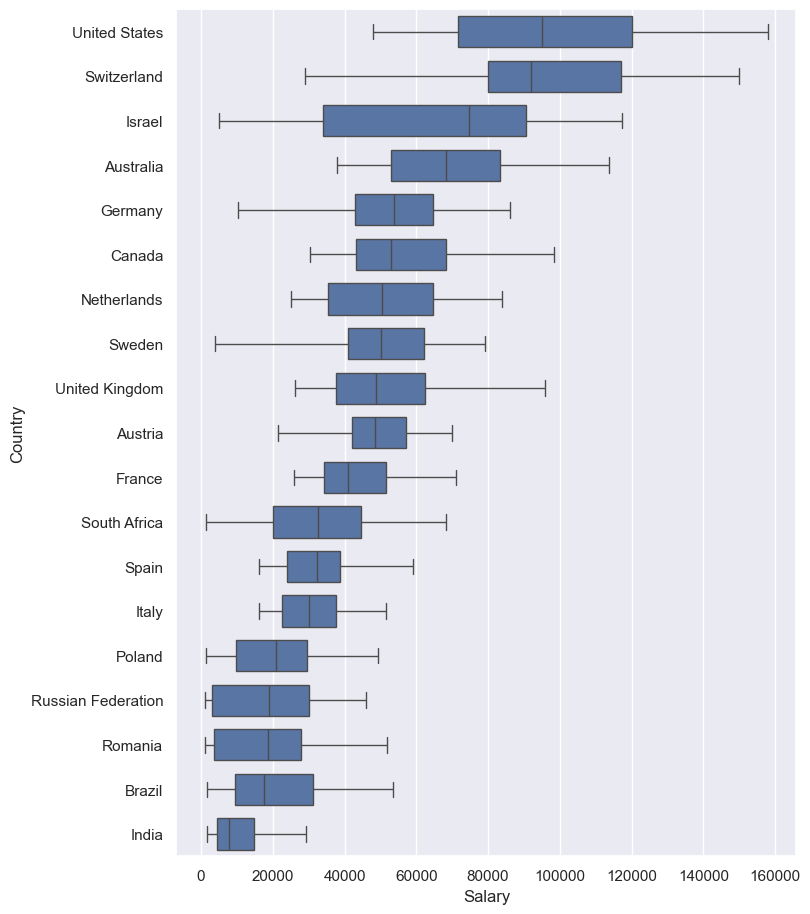

In [9]:
sort_indx = filtered_df.groupby('Country')['Salary'].median().sort_values(ascending = False).index # sort countries by salary 

sns.boxplot(data=filtered_df, y='Country', x='Salary', order=sort_indx, width=0.7, gap=0, whis=[5, 95], showfliers=False, legend='brief', ax=None);

As shown in the diagram above country with the highst salary is the United States. 5% of the participans in the U.S. earn less than 45.000 \\$ . 50% earn less and 50% earn more than 93.000 \$. 5% of the U.S. particiats state that they earn more that 159.000 \\\$.


#### Question 2: Do the amount of salary per country also relate to the Jobsatisfaction?

THe first question made me curious if the jobsatisfaction is related to the different countries where the participants came from

In [10]:
result = df.groupby('Country')['JobSatisfaction'].mean()
print(result)

Country
Afghanistan             7.464286
Aland Islands           5.888889
Albania                 6.581395
Algeria                 4.823529
American Samoa          0.000000
                          ...   
Virgin Islands (USA)    8.200000
Yemen                   9.000000
Zaire                   6.000000
Zambia                  7.285714
Zimbabwe                5.933333
Name: JobSatisfaction, Length: 201, dtype: float64


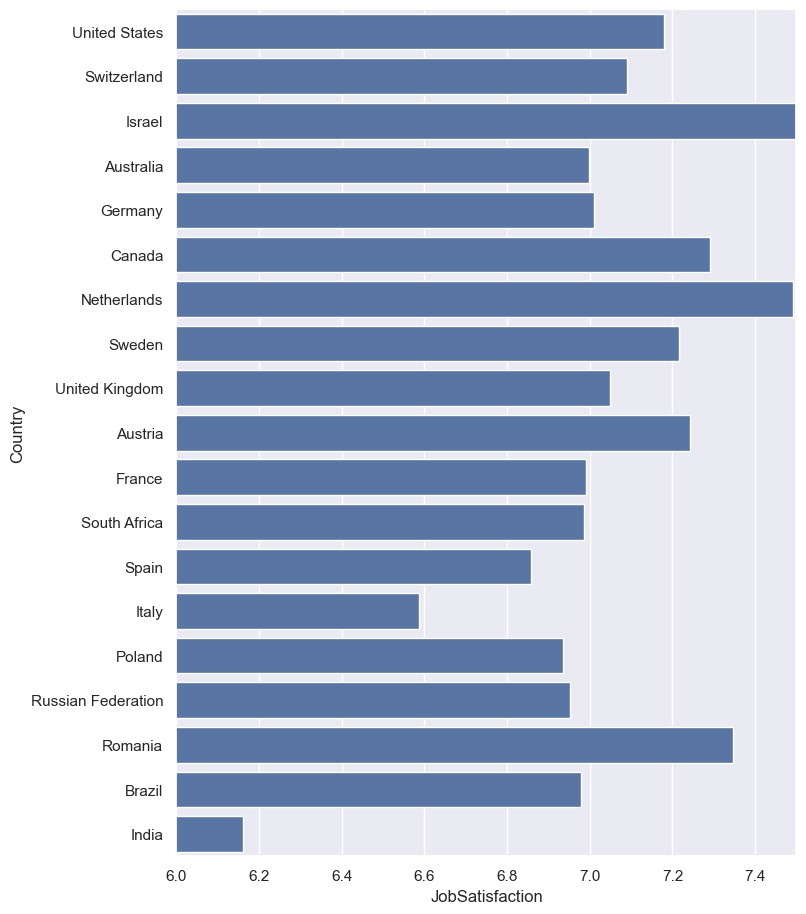

In [11]:
list_js = filtered_df.groupby('Country')['JobSatisfaction'].mean().index

# only check countries of interest from Question 1
df_js = result[sort_indx].to_frame()

sns.barplot(y='Country', x = 'JobSatisfaction', data=df_js,orient='y', hue_order='JobSatisfaction');
plt.xlim(6, 7.5) ;


There does not seem to be a clear correlation between the earnings in a country and the jobsatisfation. Romania for example is at the lower end of the earnings. However, it is the country with the 3rd highst Jobsatisfaction in this dataset.  

#### Question 3: Which factors influence Jobsatisfaction most?

This leads me to my 3. Question. I wanted to understand why Indians and Romanias differ in Jobsatisfaction 

In [13]:
df_q3 = df.dropna(subset=['JobSatisfaction'], axis=0).copy(deep=True)

In [14]:
df_q3.shape

(40376, 154)

In [15]:
y.shape

NameError: name 'y' is not defined

In [117]:
    # Drop respondent and expected salary columns
#df_q3 = df_q3[['Overpaid', 'FormalEducation', 'ProgramHobby', 'HomeRemote', 'CompanySize','JobSatisfaction']].copy()
df_q3.dropna(axis=0, inplace=True, subset = ( 'JobSatisfaction'))
df_q3.reset_index(inplace=True)

In [155]:
y = df_q3['JobSatisfaction']

In [133]:
df_q3.drop(['JobSatisfaction'], axis=1, inplace=True)

KeyError: "['JobSatisfaction'] not found in axis"

In [157]:
df_q3_a= df_q3

In [158]:
    # Fill numeric columns with the mean
num_vars = df_q3.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df_q3.drop([col], axis=1, inplace=True)

In [151]:
# Dummy the categorical variables
cat_vars = df_q3.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df_q3 = pd.concat([df_q3.drop(var, axis=1), pd.get_dummies(df_q3[var], prefix=var, prefix_sep='_', drop_first=True, dummy_na=True)], axis=1)


In [162]:
X_train, X_test, y_train, y_test = train_test_split(df_q3, y, test_size=0.2, random_state=42)

In [163]:
#Four steps:

#Instantiate
lm_model = LinearRegression() 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 

#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)
print(rsquared_score)

KeyboardInterrupt: 

In [ ]:
def coef_weights(coefficients, X_train):
    ''',,,,,,,,,,,,,,,
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(50)